In [196]:
import matplotlib.pyplot as plt
import pandas as pd

In [197]:
df = pd.read_csv('marketing.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Variable Encoding

### Response

In [198]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Engaged'].value_counts()

Engaged
0    7826
1    1308
Name: count, dtype: int64

## Features

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [200]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

### Creating Dummy Variables

In [201]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

encoded_df = pd.get_dummies(df[columns_to_encode]) #直接把columns_to_encode的欄位進行one-hot encoding
encoded_df

,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,...,Marital Status_Married,Marital Status_Single,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,True,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
1,True,False,False,False,False,True,False,True,False,False,...,False,True,True,False,False,False,False,False,True,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,False,False,True,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
4,True,False,False,False,False,True,False,True,False,False,...,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,True,False,True,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
9130,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
9131,False,True,False,False,False,True,False,True,False,False,...,False,True,True,False,False,False,False,False,True,False
9132,False,True,False,False,True,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False


Save the columns after one-hot encoding.

In [202]:
categorical_features = encoded_df.columns.to_list()

Merge the columns with the original dataframe.

In [203]:
df = pd.concat([df, encoded_df], axis=1)

### Encoding Gender with Label Encoding

In [204]:
df["Gender"] = df["Gender"].map({"M": 0, "F": 1})
categorical_features.append("Gender")

### All Features and Response

In [205]:
# X 特徵值欄位

all_features = continuous_features + categorical_features

## Training and Testing

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[all_features], df["Engaged"], test_size=0.3)

X_train.shape
X_test.shape

(2741, 50)

### Building RandomForest Model

In [207]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [208]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluating Models

Get the accuracy, precision, and recall score of the model.

In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_preds = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_test_preds)}")
print(f"Precision: {precision_score(y_test, y_test_preds)}")
print(f"Recall: {recall_score(y_test, y_test_preds)}")
print(f"F1 Score: {f1_score(y_test, y_test_preds)}")

Accuracy: 0.9945275446917183
Precision: 0.9796954314720813
Recall: 0.9821882951653944
F1 Score: 0.9809402795425667


### ROC and AUC

In [210]:
from sklearn.metrics import roc_curve, auc

In [211]:
rf_model_predsba = rf_model.predict_proba(X_test)[:,1]

In [212]:
X_test_fpr, X_test_tpr, _ = roc_curve(y_test, rf_model_predsba)

In [213]:
X_test_roc_auc = auc(X_test_fpr, X_test_tpr)

Draw the figure.

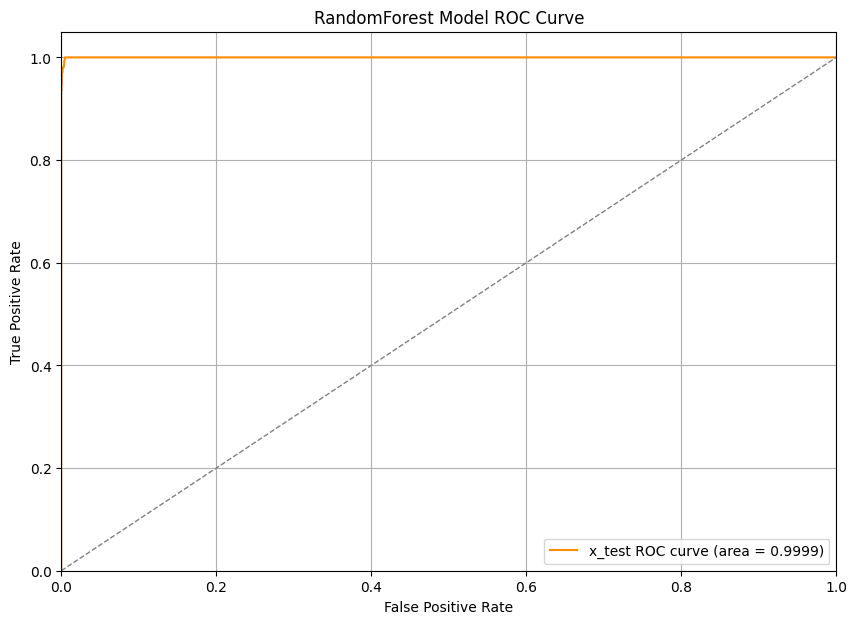

In [214]:
plt.figure(figsize=(10, 7))

plt.plot(
    X_test_fpr,
    X_test_tpr,
    color='darkorange',
    label='x_test ROC curve (area = %0.4f)' % X_test_roc_auc,
)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

### Feature Importances

In [215]:
rf_model.feature_importances_


array([0.10200273, 0.09528068, 0.07886472, 0.07915036, 0.08936572,
       0.02128485, 0.04154654, 0.09566102, 0.01564466, 0.01141717,
       0.00946544, 0.0095338 , 0.00956017, 0.01206328, 0.0094682 ,
       0.01202428, 0.00087978, 0.00184978, 0.00915485, 0.00592933,
       0.01198402, 0.00247419, 0.00340651, 0.00412328, 0.00480793,
       0.0054574 , 0.00537094, 0.00105119, 0.00124683, 0.00237862,
       0.00425813, 0.00465851, 0.00255708, 0.00496738, 0.01186326,
       0.00701254, 0.05963787, 0.007607  , 0.01240372, 0.01436131,
       0.01174408, 0.01321999, 0.01507958, 0.00660302, 0.01325831,
       0.00977483, 0.01201456, 0.0116239 , 0.00677936, 0.01812734])

In [216]:
feature_importance_df = pd.DataFrame({
    "fe": all_features,
    "importance": rf_model.feature_importances_
})

feature_importance_df

,fe,importance
0,Customer Lifetime Value,0.102003
1,Income,0.095281
2,Monthly Premium Auto,0.078865
3,Months Since Last Claim,0.079150
4,Months Since Policy Inception,0.089366
5,Number of Open Complaints,0.021285
6,Number of Policies,0.041547
7,Total Claim Amount,0.095661
8,Sales Channel_Agent,0.015645
9,Sales Channel_Branch,0.011417


依照重要性排序，並選出 5 個特徵。

In [217]:
top5_features = feature_importance_df.sort_values("importance", ascending=False).head(5)

top5_features

,fe,importance
0,Customer Lifetime Value,0.102003
7,Total Claim Amount,0.095661
1,Income,0.095281
4,Months Since Policy Inception,0.089366
3,Months Since Last Claim,0.079150


### Expected Engagement

In [218]:
rf_model_proba = rf_model.predict_proba(df[all_features])

client_buylist_df = pd.DataFrame(
    {"ID": df["Customer"], "顧客實際參與狀況": df["Engaged"], "顧客預估參與機率": rf_model_proba[:, 1]}
).sort_values(
    by="顧客預估參與機率", ascending=False
)

client_buylist_df

,ID,顧客實際參與狀況,顧客預估參與機率
3021,PP97061,1,1.0
8891,YR10848,1,1.0
5890,IF30418,1,1.0
8956,MI91352,1,1.0
1400,LT32391,1,1.0
...,...,...,...
5074,ZD75163,0,0.0
5065,TP39671,0,0.0
5063,VU47281,0,0.0
5053,JM89095,0,0.0


輸出推薦名單。

In [219]:
client_buylist_df.to_csv("顧客產品推薦清單.csv")